In [7]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [78]:
def findMaxContourWithOtsu(img):
    
    # グレースケール変換
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 方法2 （OpenCVで実装）   
    blur = cv2.GaussianBlur(gray, (5, 5), 1)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_OTSU)    
    thresh = cv2.bitwise_not(thresh)
    
    # Find Contours
    _, contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contours.sort(key=cv2.contourArea, reverse=True)
    
    return contours[0]

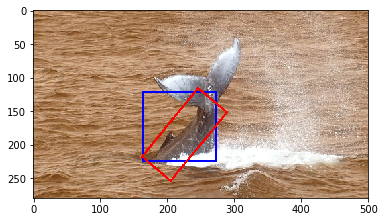

(205, 254)
(1, 2)
[[205 254]
 [162 218]
 [246 116]
 [289 152]]


In [127]:
img = cv2.imread('whale/images/G0010803.JPG')
img = cv2.imread('whale/images/G0010043.JPG')

# img = cv2.imread('index.JPG')

img_copy = img.copy()

cnt = findMaxContourWithOtsu(img)
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# plt.imshow(img), plt.show()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(255,0,0),2)

plt.imshow(img), plt.show()


# cnt = findMaxContourWithOtsu(img1)
# x, y, w, h = cv2.boundingRect(cnt)
# cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)

# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# img1 = cv2.drawContours(img1,[box],0,(255,0,0),2)

# plt.imshow(img1), plt.show()

print(tuple(box[0]) )

hoge = 1, 2

print(hoge)
img_copy = cv2.circle(img_copy, tuple(box[0]), 4, (255,0,0), -1)
img_copy = cv2.circle(img_copy, tuple(box[1]), 4, (0,255,0), -1)
img_copy = cv2.circle(img_copy, tuple(box[2]), 4, (0,0,255), -1)
img_copy = cv2.circle(img_copy, tuple(box[3]), 4, (255,255,0), -1)

# plt.imshow(img_copy), plt.show()
print(box)

200.1564178466797 162.8200225830078
15.984801520234583
((228.66250610351562, 149.69296264648438), (200.1564178466797, 162.8200225830078), -15.904702186584473)


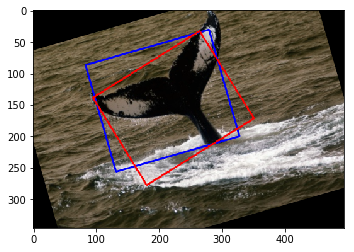

In [125]:
w, h = rect[1]
print(w, h)

def calc_angle(box):
    # choose the longer edge of the rotated rect to compute the angle
    edge1 = box[0] - box[1]
    edge2 = box[2] - box[1]

    edge = edge1
    if np.linalg.norm(edge2) > np.linalg.norm(edge1):
                edge = edge2;

    ref = np.array([1,0]) # horizontal edge
    angle = 180/math.pi * math.acos((ref[0]*edge[0] + ref[1]*edge[1]) / (np.linalg.norm(ref) *np.linalg.norm(edge)))
    print(angle)    
    
    return angle
    
h, w = img.shape[:2]
angle = calc_angle(box)
M = cv2.getRotationMatrix2D((w/2,h/2),angle,1)
dst = cv2.warpAffine(img,M,(w,h))
plt.imshow(dst)
print(rect)

-15.904702186584473


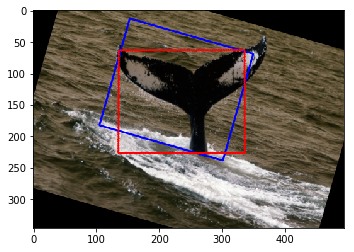

In [126]:
w, h = rect[1]
angle = rect[2]
if w<h :
    angle += 90

print(angle)
h, w = img.shape[:2]
M = cv2.getRotationMatrix2D((w/2,h/2),angle,1)
dst = cv2.warpAffine(img,M,(w,h))
plt.imshow(dst)